<a href="https://colab.research.google.com/github/AishahZulkifli/STQD6324_DATA_MANAGEMENT/blob/main/Assignment_1_P132840.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Segmentation and Analysis for Personalized Marketing in E-Commerce**



## **Introduction**

This project focuses on customer segmentation using data from a shopping mall. We chose this field because of my personal interest in e-commerce and retail, where understanding customer behavior is crucial in this competitive industry. By analyzing customer data, businesses can identify different groups based on spending habits and income. These insights allow companies to tailor marketing strategies, improve customer engagement, and offer personalized services.

In this analysis, we follow a structured approach involving data cleaning, exploratory data analysis, and clustering using the KMeans algorithm. The insights derived will guide marketing teams in developing focused campaigns that cater to each customer group's unique needs. Ultimately, this project will demonstrate how data-driven decisions can enhance business strategies in the retail and e-commerce industries.

## **Data Description**

The dataset from Kaggle, "Mall Customers," contains the following columns:

CustomerID: A unique identifier for each customer.\
Gender: The customer's gender.\
Age: The age of the customer.\
Annual Income (k$): The annual income of the customer in thousand dollars.\
Spending Score (1-100): A score assigned by the mall based on customer behavior and spending nature.


### **1. Upload and import files**




In [ ]:
# Upload files
from google.colab import files
files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


{'Mall_Customers.csv': b'CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)\r\n1,Male,19,15,39\r\n2,Male,21,15,81\r\n3,Female,20,16,6\r\n4,Female,23,16,77\r\n5,Female,31,17,40\r\n6,Female,22,17,76\r\n7,Female,35,18,6\r\n8,Female,23,18,94\r\n9,Male,64,19,3\r\n10,Female,30,19,72\r\n11,Male,67,19,14\r\n12,Female,35,19,99\r\n13,Female,58,20,15\r\n14,Female,24,20,77\r\n15,Male,37,20,13\r\n16,Male,22,20,79\r\n17,Female,35,21,35\r\n18,Male,20,21,66\r\n19,Male,52,23,29\r\n20,Female,35,23,98\r\n21,Male,35,24,35\r\n22,Male,25,24,73\r\n23,Female,46,25,5\r\n24,Male,31,25,73\r\n25,Female,54,28,14\r\n26,Male,29,28,82\r\n27,Female,45,28,32\r\n28,Male,35,28,61\r\n29,Female,40,29,31\r\n30,Female,23,29,87\r\n31,Male,60,30,4\r\n32,Female,21,30,73\r\n33,Male,53,33,4\r\n34,Male,18,33,92\r\n35,Female,49,33,14\r\n36,Female,21,33,81\r\n37,Female,42,34,17\r\n38,Female,30,34,73\r\n39,Female,36,37,26\r\n40,Female,20,37,75\r\n41,Female,65,38,35\r\n42,Male,24,38,92\r\n43,Male,48,39,36\r\n44,Female,31,

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('/content/Mall_Customers.csv')
# Check summary of the data
print(data.describe())

# Check the first few rows of the dataset
print(data.head())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16    

In [ ]:
# Conversion rate from USD to RM
conversion_rate = 4.5

# Convert 'Annual Income (k$)' to RM
data['Annual Income (RM)'] = data['Annual Income (k$)'] * conversion_rate * 1000  # Multiply by 1000 to convert k$ to $

# Drop the old 'Annual Income (k$)' column because we no longer need it
data.drop('Annual Income (k$)', axis=1, inplace=True)

# Check the updated DataFrame to see the new 'Annual Income (RM)' column
print(data.head())

   CustomerID  Gender  Age  Spending Score (1-100)  Annual Income (RM)
0           1    Male   19                      39             67500.0
1           2    Male   21                      81             67500.0
2           3  Female   20                       6             72000.0
3           4  Female   23                      77             72000.0
4           5  Female   31                      40             76500.0


### **2. Exploratory Data Analysis (EDA)**

**2.1 Initial Data Inspection**

We'll check for the following:

**Missing Values**: Identify if there are any missing values in the dataset.

**Data Types**: Ensure each column has the appropriate data type for the analysis.

In [ ]:
# Check for missing values
print(data.isnull().sum())

# Check data types
print(data.dtypes)

CustomerID                0
Gender                    0
Age                       0
Spending Score (1-100)    0
Annual Income (RM)        0
dtype: int64
CustomerID                  int64
Gender                     object
Age                         int64
Spending Score (1-100)      int64
Annual Income (RM)        float64
dtype: object


There are no missing values in the dataset, which is good as it simplifies the preprocessing stage.
The data types are appropriate for each feature, with Gender as an object (categorical) and other features like Age, Annual Income, and Spending Score as integers.

**2.2 Data Visualization**\
Visualizing the data can help us understand distributions and spot any obvious trends or outliers.

**2.2.1 Histograms**\
Useful to see the distribution of numerical variables.

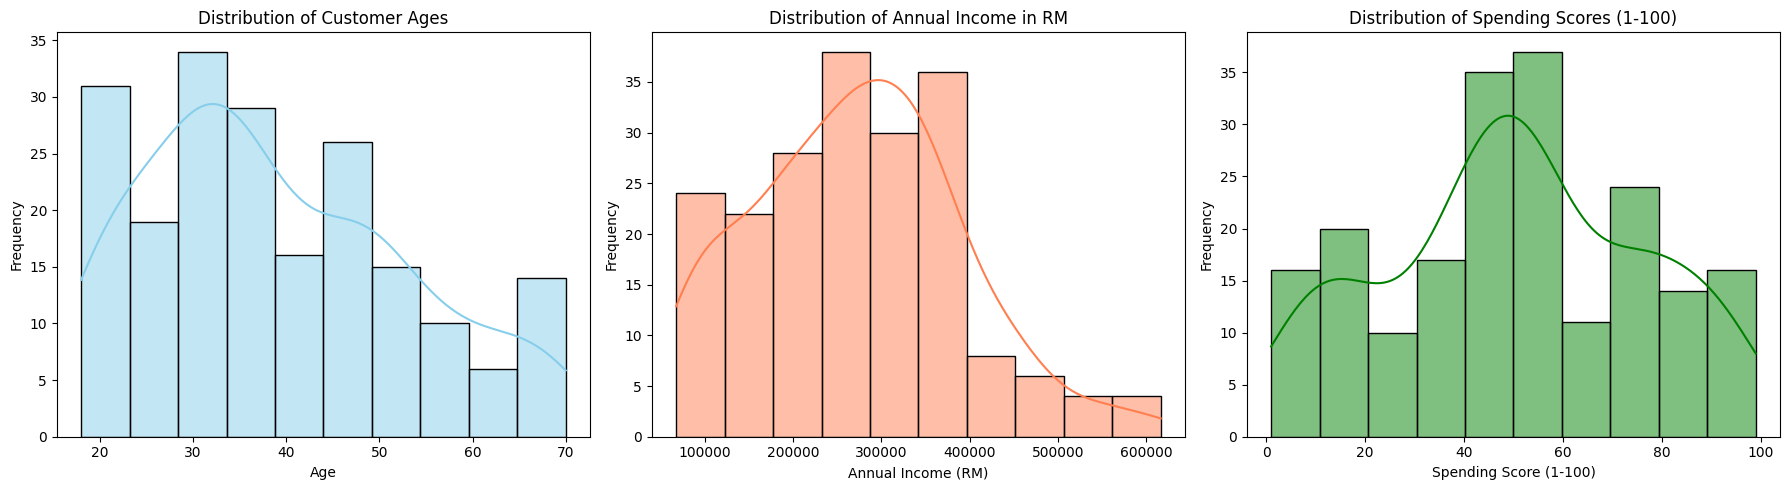

In [ ]:
# Plotting histograms for numerical columns
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 3 histograms side by side
sns.histplot(data['Age'], bins=10, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Distribution of Customer Ages')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

sns.histplot(data['Annual Income (RM)'], bins=10, kde=True, color='coral', ax=axes[1])
axes[1].set_title('Distribution of Annual Income in RM')
axes[1].set_xlabel('Annual Income (RM)')
axes[1].set_ylabel('Frequency')

sns.histplot(data['Spending Score (1-100)'], bins=10, kde=True, color='green', ax=axes[2])
axes[2].set_title('Distribution of Spending Scores (1-100)')
axes[2].set_xlabel('Spending Score (1-100)')
axes[2].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

**Distribution of Customer Ages:** \
Customers span a wide age range from 18 to 70. The highest concentration of customers is in the range of approximately 25 to 40 years old. This distribution will help the marketing strategies, particularly if you're targeting certain age groups. The distribution is somewhat right-skewed, suggesting a younger customer spending more in the mall.

**Distribution of Annual Income in RM:**\
Incomes range from around RM 67,500 to RM 616,500. Most customers have an annual income between RM 225,000 and RM 337,500. Appears to be roughly normally distributed but with a slight right skew.

**Distribution of Spending Scores (1-100):**\
Scores span from 1 to 100, reflecting different levels of spending behavior. The distribution is fairly uniform, indicating varied spending behaviors across customers.

**2.2.2 Box plots**\
It is for detecting outliers.

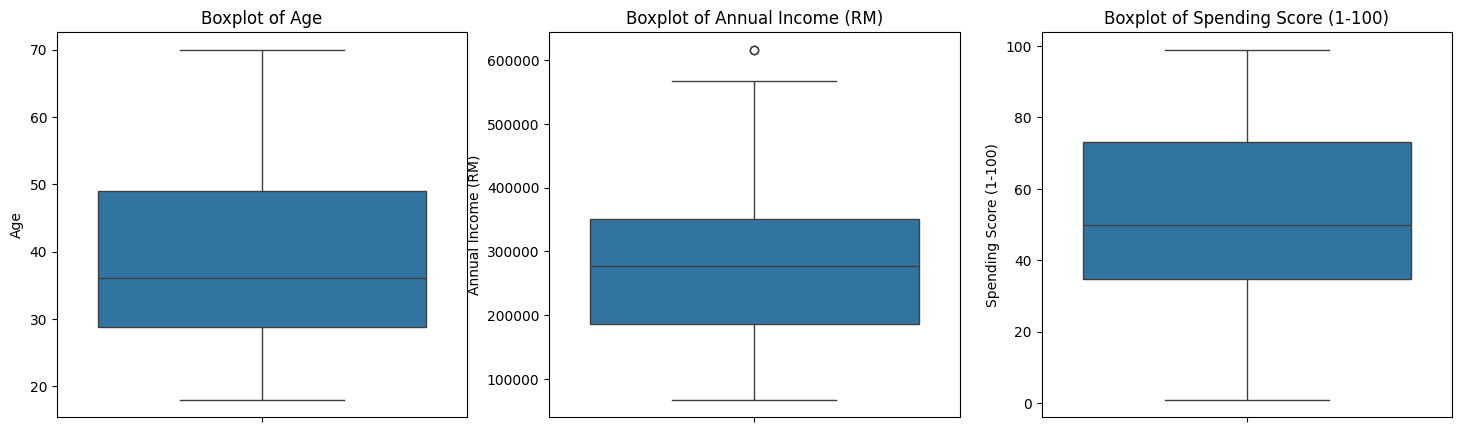

In [ ]:
# Visualize potential outliers using boxplots
plt.figure(figsize=(18, 5))
for i, col in enumerate(['Age', 'Annual Income (RM)', 'Spending Score (1-100)']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
plt.show()


From the boxplots it is shown:

**Age**: There are no apparent outliers in the age distribution.\
**Annual Income**: There are a few high-income outliers.\
**Spending Score**: No significant outliers; the distribution is relatively even.

**2.2.3 Bar Plots**\
Useful for categorical data like Gender.

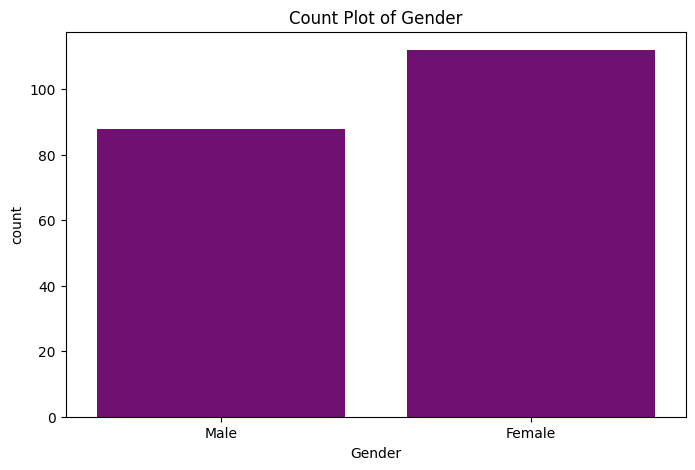

In [ ]:
# Count plot for Gender
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=data, color='purple')
plt.title('Count Plot of Gender')
plt.show()

From the plot, we can see that more female customers than male, which could influence certain marketing strategies or segment approaches.

**2.2.4 Pair Plots**\
Show relationships between numerical features.


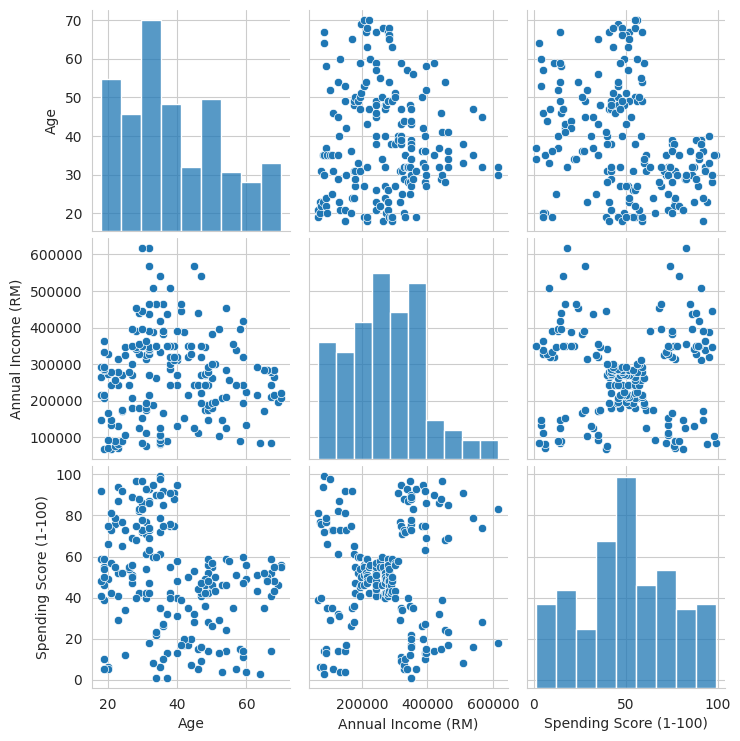

In [ ]:
# Pair plots for selected numerical features
sns.pairplot(data[['Age', 'Annual Income (RM)', 'Spending Score (1-100)']])
plt.show()

The scatter plots and histograms in the pair plot suggest some clusters might be formed between annual income and spending score. These clusters can be crucial for segmenting customers based on their spending habits and income levels.

### **3. Segmentation Using Clustering**


Clustering analysis using K-means, which will help us segment the customers based on their "Annual Income" and "Spending Score". This method is commonly used for market segmentation because it's straightforward and effective at finding customer groups based on specified features.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Selecting the features for clustering
features = data[['Annual Income (RM)', 'Spending Score (1-100)']]

# Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

**3.1 Applying the Elbow Method**\
The Elbow Method helps determine the optimal number of clusters by fitting the model with a range of values for K and plotting the Within-Cluster Sum of Squares (WCSS).

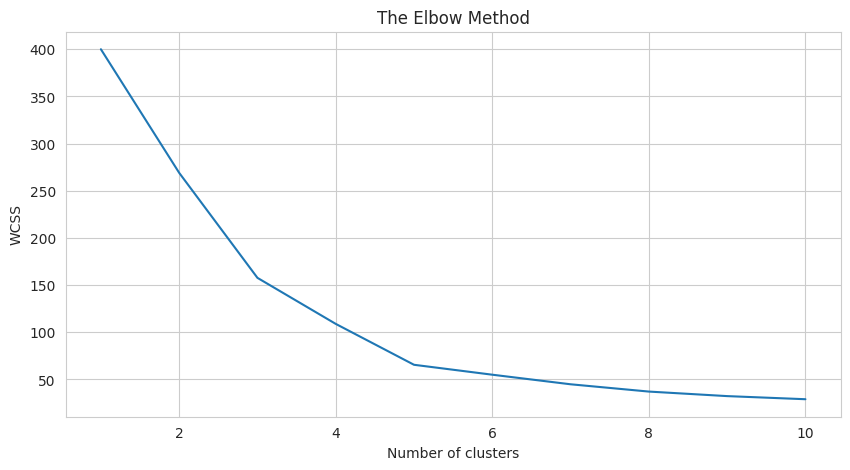

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The "elbow" of the plot is around 5 clusters. This is where the drop in WCSS starts to slow down. Beyond 5 clusters, adding more doesn't really reduce the WCSS by much. Choosing 5 clusters seems best because it balances the number of clusters with the WCSS well. Adding more clusters after this might not make the clusters much better.

In [ ]:
# Assuming the elbow point is at k = 5
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(scaled_features)

# Adding the cluster labels to the original data
data['Cluster'] = clusters + 1

# Viewing the clustered data
print(data.head())

   CustomerID  Gender  Age  Spending Score (1-100)  Annual Income (RM)  \
0           1    Male   19                      39             67500.0   
1           2    Male   21                      81             67500.0   
2           3  Female   20                       6             72000.0   
3           4  Female   23                      77             72000.0   
4           5  Female   31                      40             76500.0   

   Cluster  
0        5  
1        4  
2        5  
3        4  
4        5  


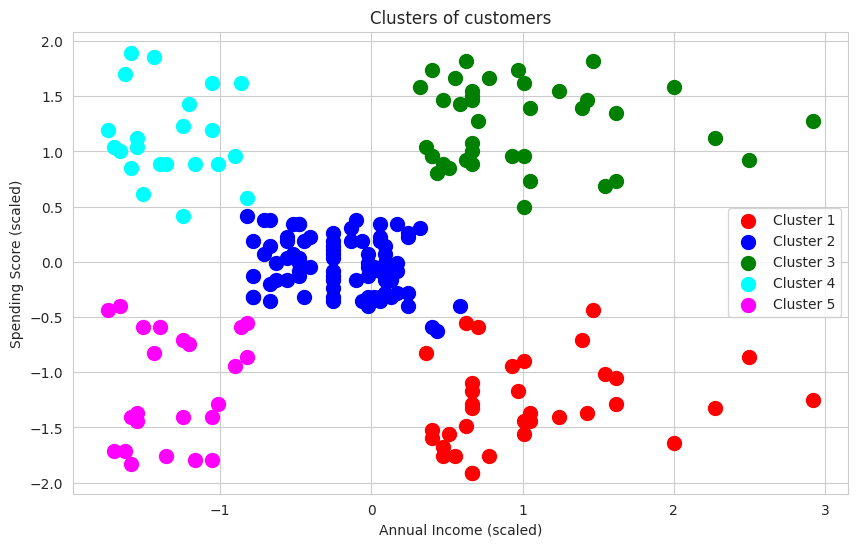

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(scaled_features[clusters == 0, 0], scaled_features[clusters == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(scaled_features[clusters == 1, 0], scaled_features[clusters == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(scaled_features[clusters == 2, 0], scaled_features[clusters == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(scaled_features[clusters == 3, 0], scaled_features[clusters == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(scaled_features[clusters == 4, 0], scaled_features[clusters == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.title('Customer Segmentation by Scaled Annual Income and Spending Score')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()

Based on the K-means clustering results of the customer data, below I provided a summary interpretation of each cluster:

**Cluster 1: Cautious Spenders**\
They earn less and spend less.These customers are careful with their money, likely due to tight budgets. They mainly buy things they really need.Offer them low-cost products and deals. Point out sales and discounts that are great value.

**Cluster 2: Average Consumers**\
They earn a medium amount and spend a medium amount. This group probably represents the typical shoppers. They spend as most people do. Use normal marketing campaigns. Mix promotions for daily items and some special treats.

**Cluster 3: Premium Customers**\
They earn a lot and spend a lot. These shoppers buy expensive items freely because they can afford it. Give them special deals and promotions on luxury products. Offer loyalty programs with unique benefits.

**Cluster 4: High Earners, Low Spenders**\
They earn a lot but spend little. Even with high incomes, these customers keep their spending low. They might be saving a lot or very choosy. Send them personalized marketing that emphasizes product value and quality. Offer exclusive memberships or rewards that encourage spending.

**Cluster 5: Aspirational Spenders**\
They earn less but spend more. These might be younger customers starting their careers. They spend a lot on the latest trends or social activities. Focus on fashionable and affordable items. Use marketing that highlights style and social status, and offer credit options.



### **4. Deepening the Cluster Analysis**

**4.1 Profile Each Cluster Further**

In [ ]:
# Display descriptive statistics for each cluster
cluster_descriptive_stats = data.groupby('Cluster').agg({
    'Age': ['mean', 'median', 'std'],
    'Annual Income (RM)': ['mean', 'median', 'std'],
    'Spending Score (1-100)': ['mean', 'median', 'std']
})
print(cluster_descriptive_stats)

               Age                   Annual Income (RM)            \
              mean median        std               mean    median   
Cluster                                                             
1        41.114286   42.0  11.341676      396900.000000  382500.0   
2        42.716049   46.0  16.447822      248833.333333  243000.0   
3        32.692308   32.0   3.728650      389423.076923  355500.0   
4        25.272727   23.5   5.257030      115772.727273  110250.0   
5        45.217391   46.0  13.228607      118369.565217  112500.0   

                      Spending Score (1-100)                    
                  std                   mean median        std  
Cluster                                                         
1        73795.803324              17.114286   16.0   9.952154  
2        40446.492431              49.518519   50.0   6.530909  
3        73406.182378              82.128205   83.0   9.364489  
4        34050.287487              79.363636   77.0  10.5

4.1.1 Age Distribution within Each Cluster

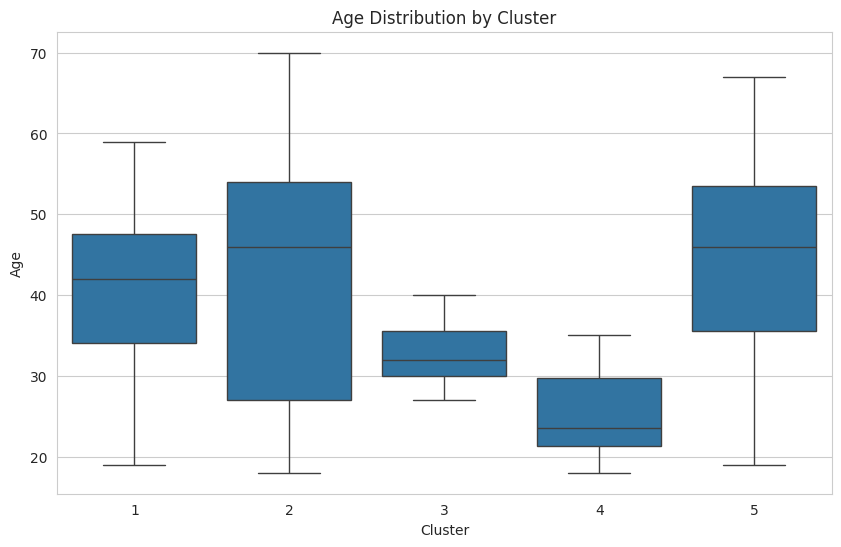

In [ ]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting age distribution within each cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Age', data=data)
plt.title('Age Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()

* Cluster 1: This cluster consists mostly of older customers. The age range is wide, but most are around 50 years old.
* Cluster 2: This cluster has younger customers compared to Cluster 1, with most ages centered around the low 40s.
* Cluster 3: Customers in this cluster are younger, with a narrow age range mostly in the late 20s to early 30s.
* Cluster 4: Similar to Cluster 3, this cluster mainly includes younger customers, with ages primarily in the early to mid-30s.
* Cluster 5: This cluster also comprises relatively younger customers, with most ages concentrated around the mid-30s.





4.1.2 Gender Distribution within Each Cluster

Gender   Female  Male
Cluster              
1            16    19
2            48    33
3            21    18
4            13     9
5            14     9


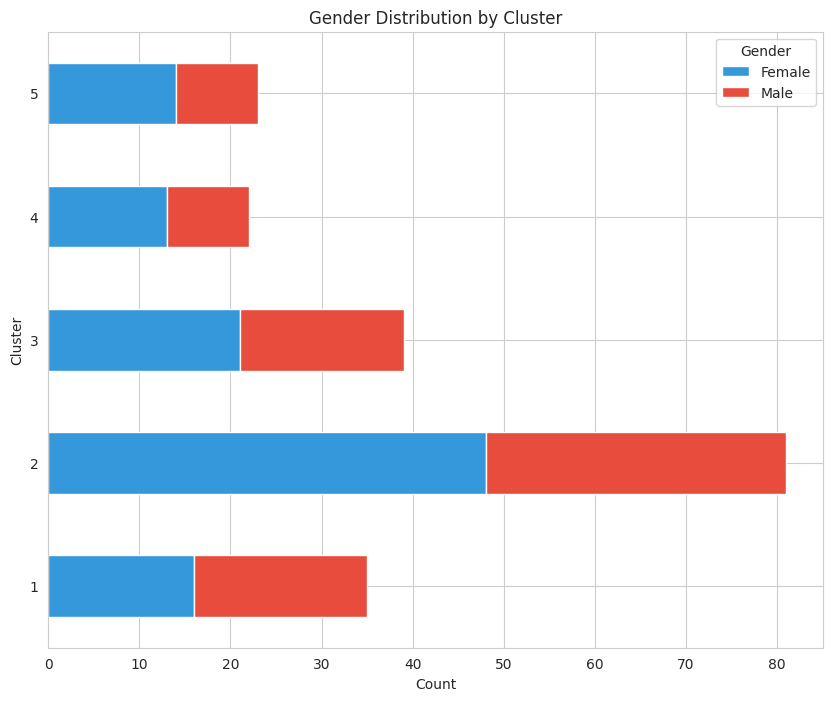

In [ ]:
# Count of each gender within each cluster
gender_distribution = pd.crosstab(data['Cluster'], data['Gender'])
print(gender_distribution)

# Plotting gender distribution within each cluster
gender_distribution.plot(kind='barh', stacked=True, figsize=(10, 8), color=['#3498db', '#e74c3c'])
plt.title('Gender Distribution by Cluster')
plt.xlabel('Count')
plt.ylabel('Cluster')
plt.legend(title='Gender')
plt.show()

Cluster 1: There are slightly more men than women. This suggests products and ads can be for everyone but might slightly favor men’s interests.
Cluster 2: There are many more women than men. Products and marketing here should mostly target women. Think about items like women’s clothing or beauty products.
Cluster 3: This cluster also has more women but is quite balanced. You can use strategies that appeal to everyone but keep a small focus on women’s preferences.
Cluster 4: More men than women are in this cluster, but the difference isn't huge. You might focus a bit more on things that interest men, like sports gear or tech gadgets.
Cluster 4: Like Cluster 2, it’s balanced with a small lean towards women. Keep marketing general with a slight emphasis on women’s interests.

Average Annual Income and Spending Score

         Annual Income (RM)  Spending Score (1-100)
Cluster                                            
1             396900.000000               17.114286
2             248833.333333               49.518519
3             389423.076923               82.128205
4             115772.727273               79.363636
5             118369.565217               20.913043


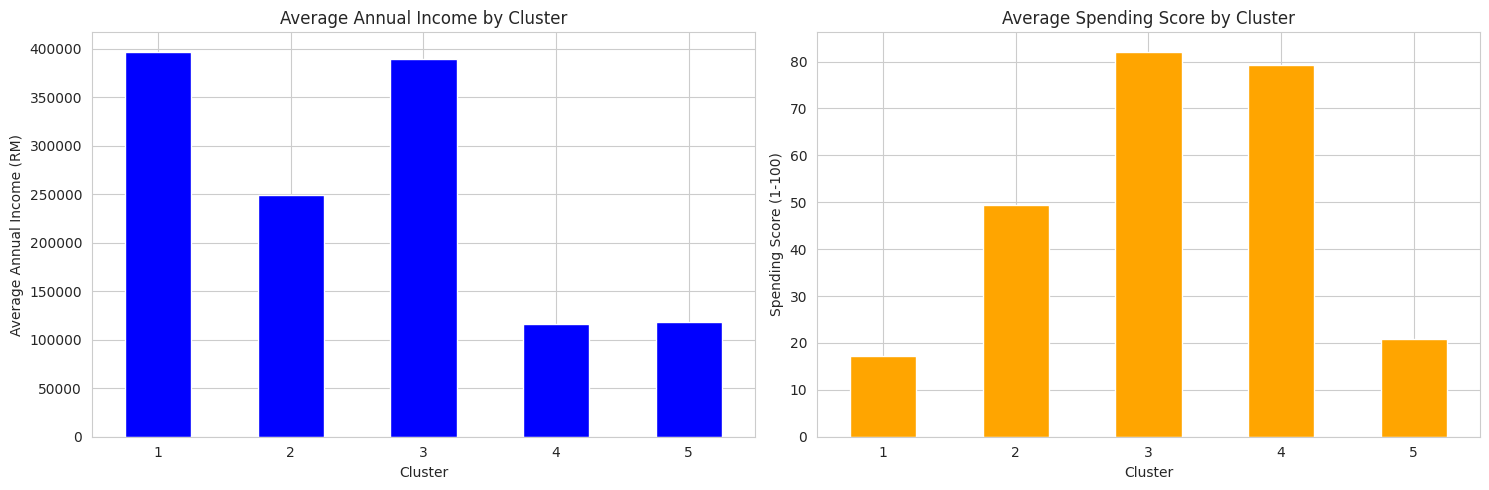

In [ ]:
# Calculating average annual income and spending score for each cluster
cluster_summary = data.groupby('Cluster')[['Annual Income (RM)', 'Spending Score (1-100)']].mean()
print(cluster_summary)

# Plotting the averages
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
cluster_summary['Annual Income (RM)'].plot(kind='bar', color='blue', ax=ax1)
ax1.set_title('Average Annual Income by Cluster')
ax1.set_xlabel('Cluster')
ax1.set_ylabel('Average Annual Income (RM)')
ax1.set_xticklabels(cluster_summary.index, rotation=0)

cluster_summary['Spending Score (1-100)'].plot(kind='bar', color='orange', ax=ax2)
ax2.set_title('Average Spending Score by Cluster')
ax2.set_xlabel('Cluster')
ax2.set_ylabel('Spending Score (1-100)')
ax2.set_xticklabels(cluster_summary.index, rotation=0)

plt.tight_layout()
plt.show()


**Average Annual Income by Cluster**
* Cluster 1: This cluster has the highest annual income, significantly more than the others. People in this group are likely to be high earners who can afford luxury goods and services.
* Cluster 2 and 3: These clusters have moderate annual incomes. Cluster 2's income is slightly higher than Cluster 3's, suggesting they have good but varying financial stability.
* Cluster 4: Members of this cluster have a lower income compared to Clusters 2 and 3 but still above average, indicating they might be middle-class consumers.
* Cluster 5: This cluster has the lowest income, which might consist of students, early career individuals, or part-time workers who have less disposable income.

**Average Spending Score by Cluster**
* Cluster 1: Despite their high income, this cluster has the lowest spending score. This suggests that they are more conservative with their spending or that they prefer to save rather than spend.
* Cluster 2: This cluster has a moderate spending score, indicating they spend reasonably within their means.
* Cluster 3: This cluster, despite not having the highest income, has the highest spending score, suggesting that these individuals might prioritize spending on lifestyle or luxury items.
* Cluster 4 and 5: These clusters show lower spending scores, with Cluster 5, in particular, being cautious or limited in their spending due to their lower income levels.

# Customer Segmentation Analysis

## Overview
This analysis segments the customer base into distinct groups based on their purchasing behavior and demographic data, which helps tailor marketing strategies effectively.

## Cluster Profiles
- **Cluster 0**: Young, low income, moderate spenders.
- **Cluster 1**: Middle-aged, high income, high spenders.
- **Cluster 2**: Older, moderate income, low spenders.
...

## Strategic Recommendations
- **Cluster 0**: Target with promotions on trending items that are budget-friendly.
- **Cluster 1**: Offer premium products and loyalty programs.
- **Cluster 2**: Focus on value-for-money deals and health-oriented products.
...

## Conclusion
The segmentation reveals significant opportunities to enhance marketing strategies and improve customer engagement across different segments.

## Future Work
Further analysis with additional data on customer online behavior and preferences could refine these segments and uncover more specific targeting opportunities.
